In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('transactions-pet_store-small_scrubbed.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              300 non-null    object 
 1   Order_Number      300 non-null    object 
 2   Customer_ID       292 non-null    object 
 3   Product_Name      300 non-null    object 
 4   SKU               300 non-null    object 
 5   Price             300 non-null    float64
 6   Size              300 non-null    object 
 7   Quantity          300 non-null    int64  
 8   Product_Category  300 non-null    object 
 9   Product_Line      300 non-null    object 
 10  Year_Month        300 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 25.9+ KB


,Date,Order_Number,Customer_ID,Product_Name,SKU,Price,Size,Quantity,Product_Category,Product_Line,Year_Month
0,2019-03-31,5ZR-4930-9569-1000,e2b695c8-bf79-46d5-9455-f53f68562af2,Feline Fix Mix,RKAPY3I1TP,39.55,one size,2,treat,cat,2019-03
1,2020-03-08,TAI-6046-9953-7908,7f5111f6-53c9-4316-b134-dd8c3b6b29f7,Purr Mix,O5FYJLBE0H,24.53,one size,2,food,cat,2020-03
2,2021-03-13,KZM-2608-1918-3044,4c3aa8dc-fc7b-4796-9c70-b0aa9a4f1977,Reddy Beddy,I2GQUNYDXW,36.30,medium,2,bedding,dog,2021-03
3,2019-06-30,VXJ-7724-4518-8390,6cb2df70-b4e9-41c6-8b90-a375376c55dd,Kitty Climber,W86BRJ9SSG,39.32,one size,3,toy,cat,2019-06
4,2019-05-21,5GV-6876-7635-4506,9d92f453-84ec-4beb-acc1-2b9d1cce8910,Chewie Dental,CG3531YP08,38.17,one size,2,treat,dog,2019-05


In [3]:
# Adding Total_price column for next exploration

df['Total_Price'] = df.Price * df.Quantity
df.describe()

,Price,Quantity,Total_Price
count,300.000000,300.000000,300.000000
mean,26.032167,2.103333,54.687133
std,8.939657,0.792517,28.723673
min,10.800000,1.000000,10.800000
25%,18.530000,1.000000,30.667500
50%,25.480000,2.000000,50.130000
75%,34.380000,3.000000,76.340000
max,39.550000,3.000000,118.650000


Total amount of orders: 267, total amount of customer IDs, that we have: 259


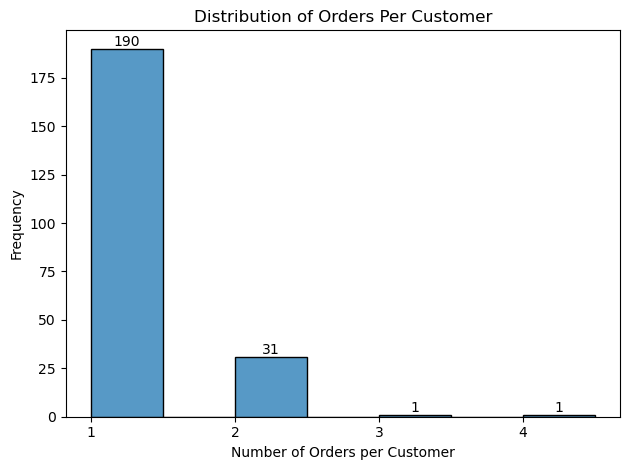

In [9]:
# Finding the number of orders per customer

orders_per_customer = df.groupby('Customer_ID')['Order_Number'].nunique()

# Here we remeber that we have 8 rows with NaN Customer_ID after scrubbing

print(f'Total amount of orders: {df.Order_Number.nunique()}, total amount of customer IDs, that we have: {orders_per_customer.sum()}')

# Visualizing the distribution of orders per customer

bins = np.arange(1, 4 + 1, .5)

ax = sns.histplot(orders_per_customer, bins=bins, kde=False)
plt.title('Distribution of Orders Per Customer')
plt.xlabel('Number of Orders per Customer')
plt.ylabel('Frequency')
plt.xticks(range(1, orders_per_customer.max()+1))

for p in ax.patches:
    x_value = p.get_x() + p.get_width() / 2
    y_value = p.get_height()
    label = f'{int(y_value)}'

    if y_value != 0:
        ax.text(x_value, y_value, label, ha='center', va='bottom')

plt.tight_layout()
plt.show()

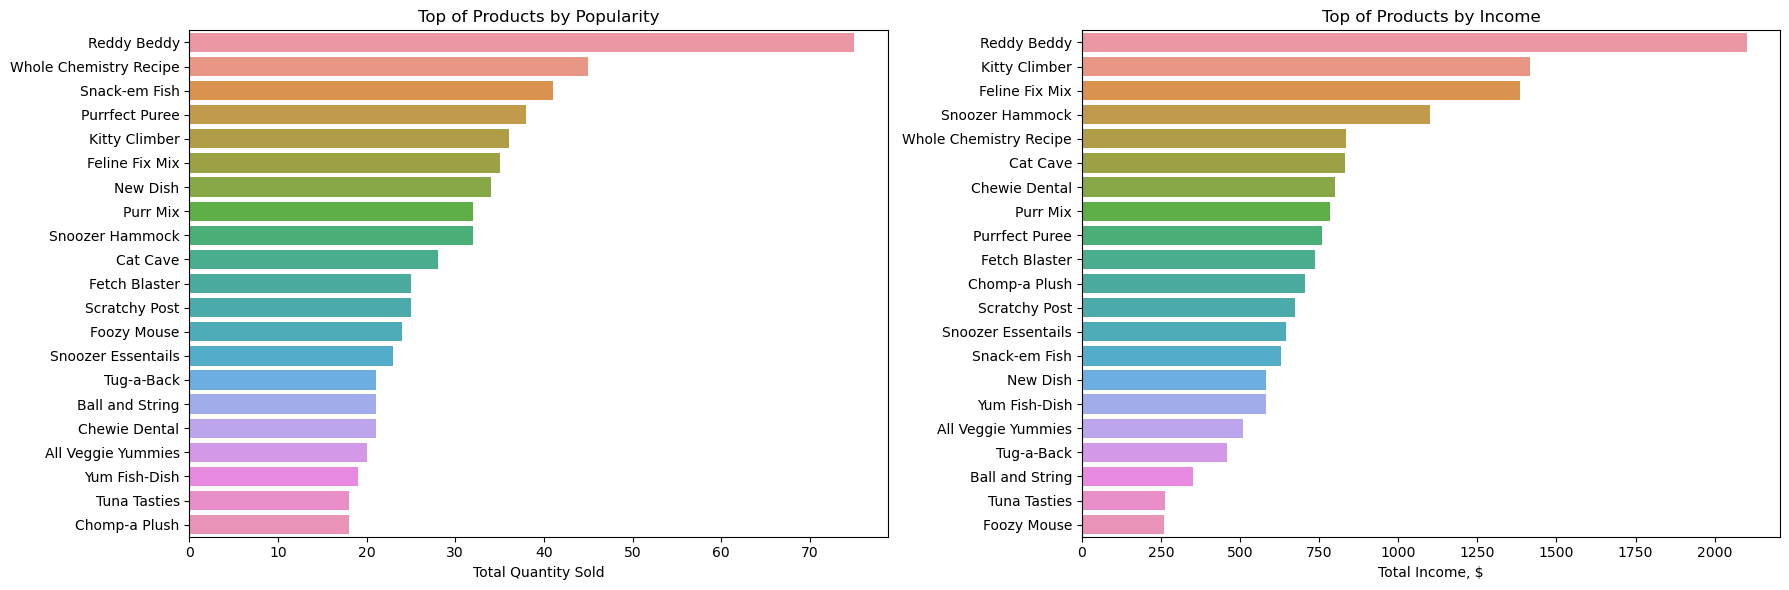

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Finding the most popular products

popular_products = df.groupby(['Product_Name']).agg({'Quantity': 'sum'}).reset_index().sort_values(by='Quantity', ascending=False)

# Visualizing the most popular products

sns.barplot(x='Quantity', y='Product_Name', data=popular_products, ax=ax[0])
ax[0].set_title('Top of Products by Popularity')
ax[0].set_xlabel('Total Quantity Sold')
ax[0].set_ylabel('')

# Finding the most valuable products

valuable_products = df.groupby(['Product_Name']).agg({'Total_Price': 'sum'}).reset_index().sort_values(by='Total_Price', ascending=False)

# Visualizing the most popular products

sns.barplot(x='Total_Price', y='Product_Name', data=valuable_products, ax=ax[1])
ax[1].set_title('Top of Products by Income')
ax[1].set_xlabel('Total Income, $')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

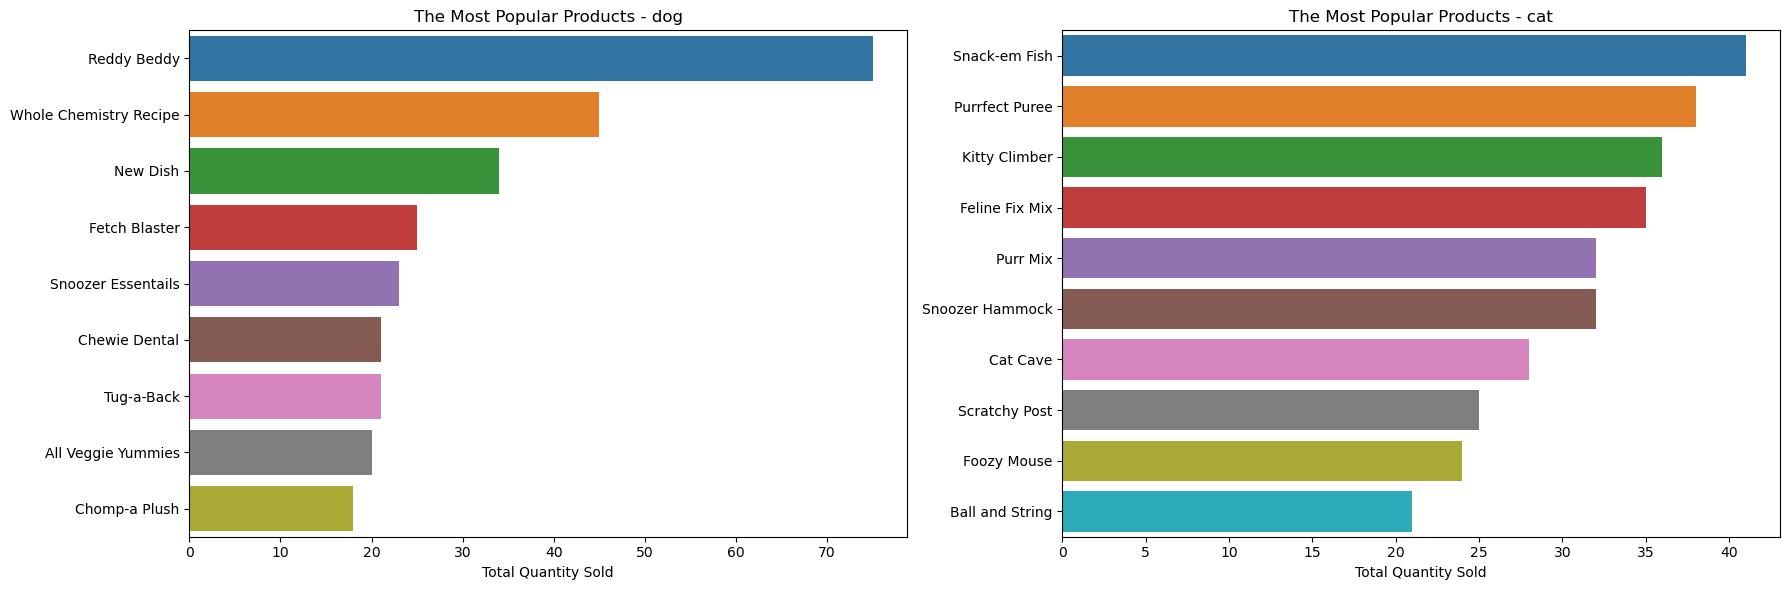

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Finding the most popular products, broken down by product line

popular_products_line = df.groupby(['Product_Name', 'Product_Line']).agg({'Quantity': 'sum'}).reset_index()
dog_mask = popular_products_line[popular_products_line.Product_Line == 'dog'].sort_values(by='Quantity', ascending=False)
cat_mask = popular_products_line[popular_products_line.Product_Line == 'cat'].sort_values(by='Quantity', ascending=False)

# Visualizing the most popular products in dog line

sns.barplot(x='Quantity', y='Product_Name', data=dog_mask, ax=ax[0])
ax[0].set_title('The Most Popular Products - dog')
ax[0].set_xlabel('Total Quantity Sold')
ax[0].set_ylabel('')

# Visualizing the most popular products in cat line

sns.barplot(x='Quantity', y='Product_Name', data=cat_mask.head(10), ax=ax[1])
ax[1].set_title('The Most Popular Products - cat')
ax[1].set_xlabel('Total Quantity Sold')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

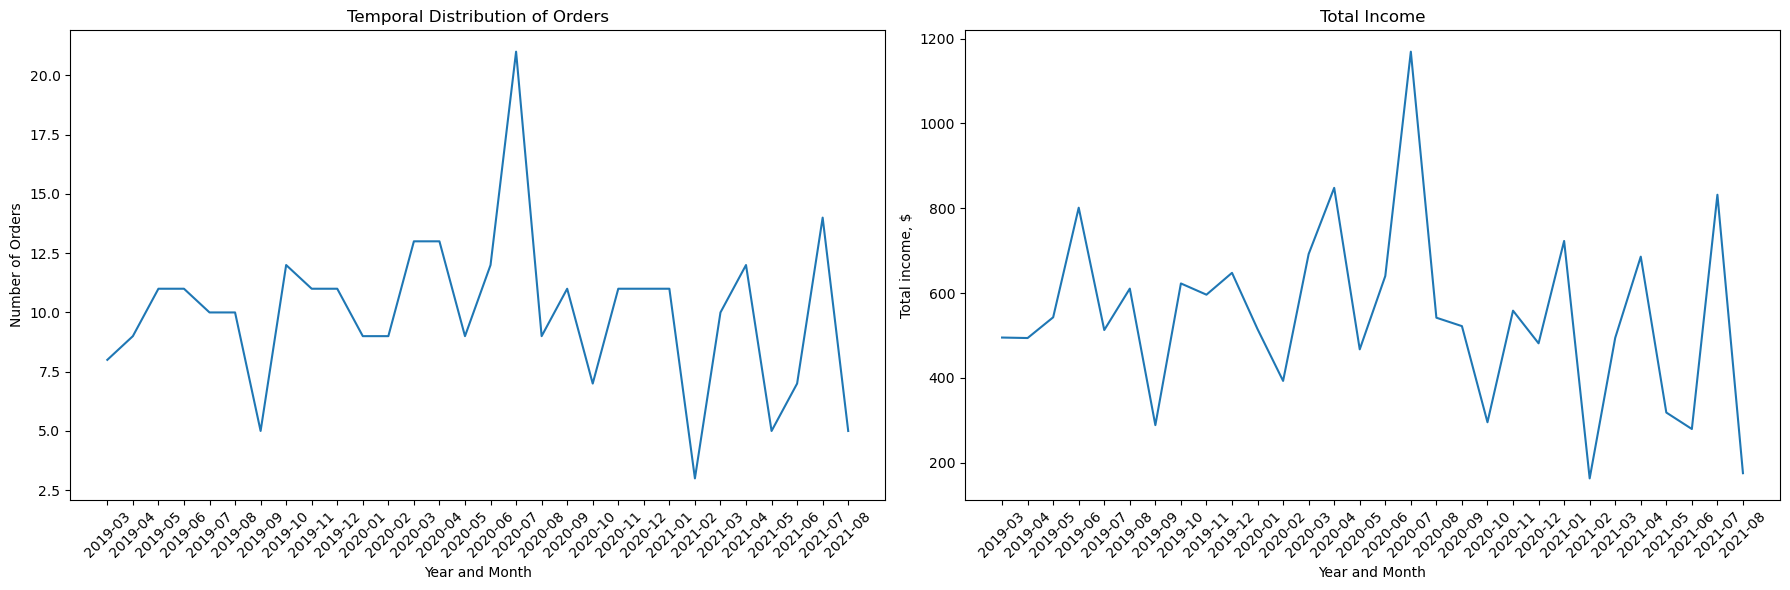

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Finding temporal distribution of transactions

orders_by_months = df.groupby(['Year_Month']).agg({'Order_Number': 'count'}).reset_index()

# Visualizing the most popular products

sns.lineplot(x='Year_Month', y='Order_Number', data=orders_by_months, ax=ax[0])
ax[0].set_title('Temporal Distribution of Orders')
ax[0].set_xlabel('Year and Month')
ax[0].set_ylabel('Number of Orders')
ax[0].tick_params(axis='x', rotation=45)

# Finding temporal distribution of transactions

incomes_by_months = df.groupby(['Year_Month']).agg({'Total_Price': 'sum'}).reset_index()

# Visualizing the most popular products

sns.lineplot(x='Year_Month', y='Total_Price', data=incomes_by_months, ax=ax[1])
ax[1].set_title('Total Income')
ax[1].set_xlabel('Year and Month')
ax[1].set_ylabel('Total income, $')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

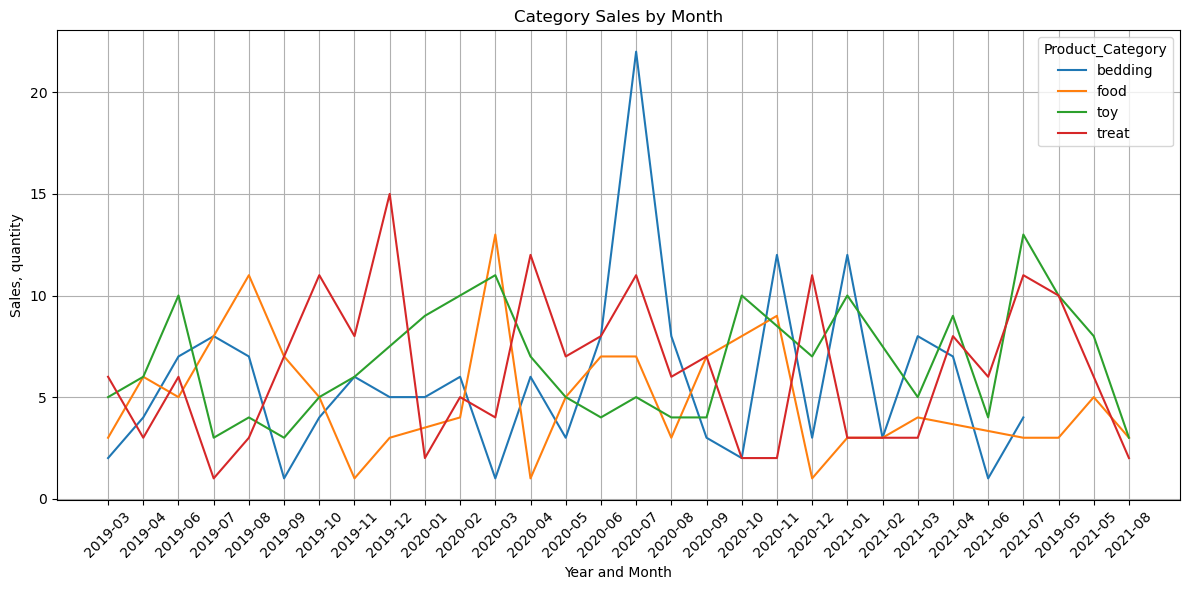

In [21]:
# Finding quantity of category sold by month

category_sales_by_month = df.groupby(['Product_Category', 'Year_Month'])['Quantity'].sum().reset_index()

# Visualizing category sales by month

plt.figure(figsize=(12, 6))
sns.lineplot(data=category_sales_by_month, x='Year_Month', y='Quantity', hue='Product_Category')

plt.xticks(rotation=45)
plt.title('Category Sales by Month')
plt.xlabel('Year and Month')
plt.ylabel('Sales, quantity')

plt.grid()
plt.tight_layout()
plt.show()

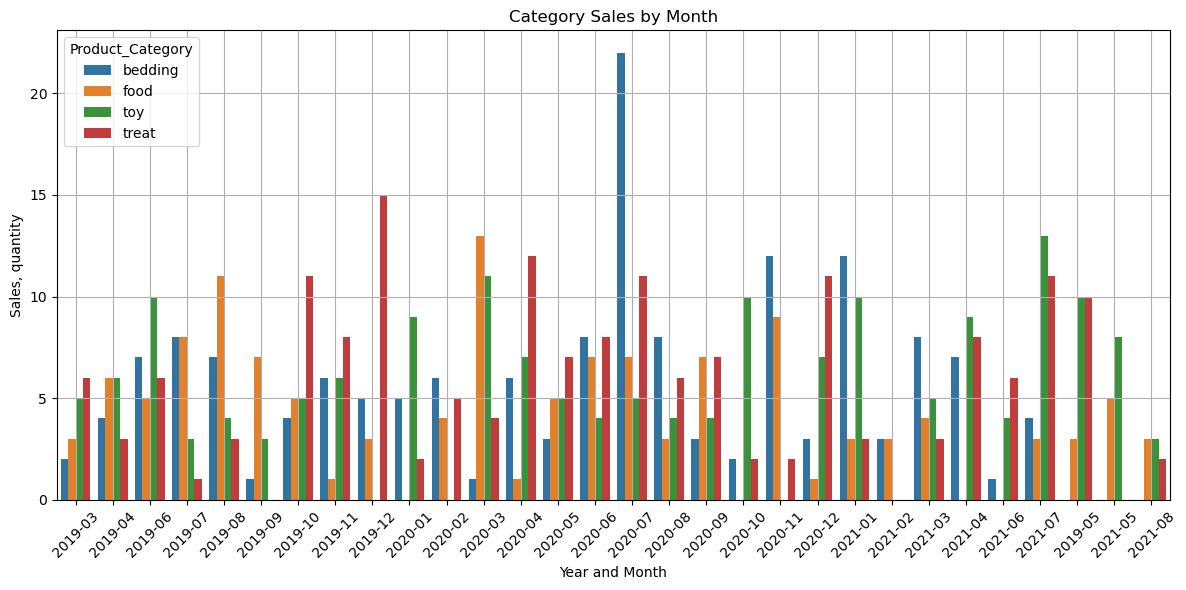

In [20]:
# Finding quantity of category sold by month

category_sales_by_month = df.groupby(['Product_Category', 'Year_Month'])['Quantity'].sum().reset_index()

# Visualizing category sales by month

plt.figure(figsize=(12, 6))
sns.barplot(data=category_sales_by_month, x='Year_Month', y='Quantity', hue='Product_Category')

plt.xticks(rotation=45)
plt.title('Category Sales by Month')
plt.xlabel('Year and Month')
plt.ylabel('Sales, quantity')

plt.grid()
plt.tight_layout()
plt.show()

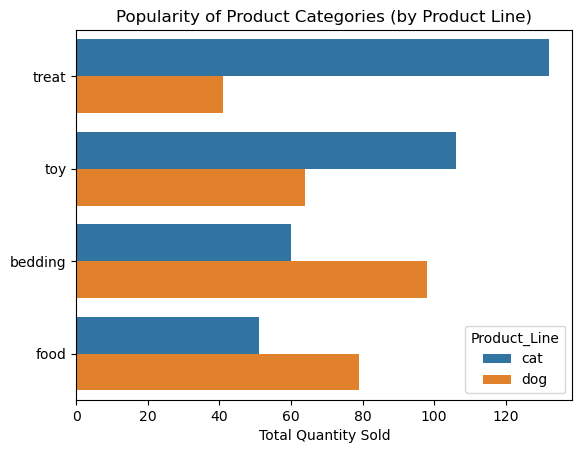

In [13]:
# Finding the most popular product categories, broken down by product line

popular_categories_line = df.groupby(['Product_Category', 'Product_Line']).agg({'Quantity': 'sum'}).reset_index()
popular_categories_line_sorted = popular_categories_line.sort_values(by='Quantity', ascending=False)

# Visualizing the most popular categories by Product Lines

sns.barplot(x='Quantity', y='Product_Category', hue='Product_Line', data=popular_categories_line_sorted)
plt.title('Popularity of Product Categories (by Product Line)')
plt.xlabel('Total Quantity Sold')
plt.ylabel('')
plt.show()

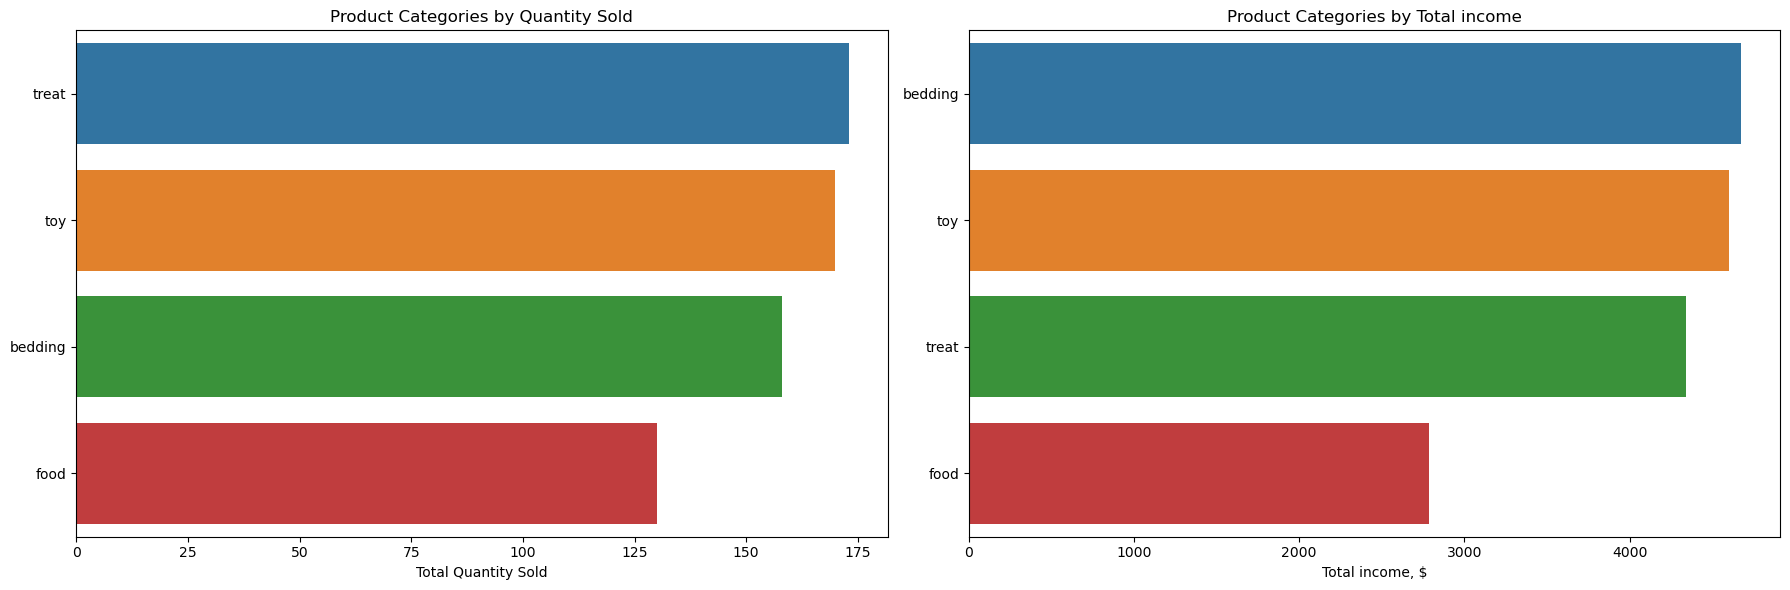

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Finding the most popular product categories

popular_categories = df.groupby(['Product_Category']).agg({'Quantity': 'sum'}).reset_index().sort_values(by='Quantity', ascending=False)

# Visualizing the most popular categories

sns.barplot(x='Quantity', y='Product_Category', data=popular_categories, ax=ax[0])
ax[0].set_title('Product Categories by Quantity Sold')
ax[0].set_xlabel('Total Quantity Sold')
ax[0].set_ylabel('')


# Finding the most valuable product categories

valuable_categories = df.groupby(['Product_Category']).agg({'Total_Price': 'sum'}).reset_index().sort_values(by='Total_Price', ascending=False)

# Visualizing the most valuable categories

sns.barplot(x='Total_Price', y='Product_Category', data=valuable_categories, ax=ax[1])
ax[1].set_title('Product Categories by Total income')
ax[1].set_xlabel('Total income, $')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

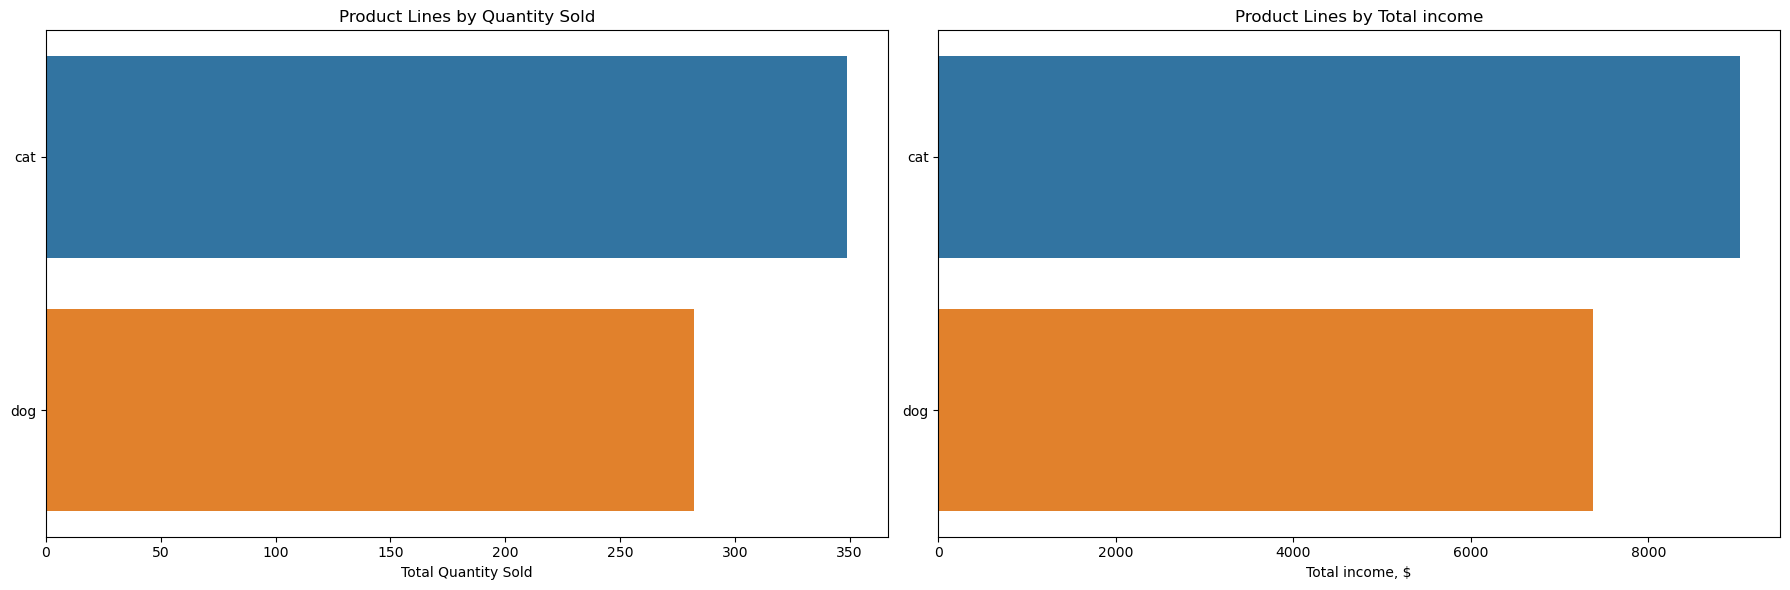

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Finding the most popular product lines

popular_lines = df.groupby(['Product_Line']).agg({'Quantity': 'sum'}).reset_index()

# Visualizing the most popular product lines

sns.barplot(x='Quantity', y='Product_Line', data=popular_lines, ax=ax[0])
ax[0].set_title('Product Lines by Quantity Sold')
ax[0].set_xlabel('Total Quantity Sold')
ax[0].set_ylabel('')

# Finding the most valuable product lines

valuable_lines = df.groupby(['Product_Line']).agg({'Total_Price': 'sum'}).reset_index()

# Visualizing the most valuable product lines

sns.barplot(x='Total_Price', y='Product_Line', data=valuable_lines, ax=ax[1])
ax[1].set_title('Product Lines by Total income')
ax[1].set_xlabel('Total income, $')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()